# Phase space plots


**Drawing phase space plots**: 

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use(['science', 'notebook'])

#### 1) example

$$x_{t} = 0.5 x_{t-1} + y_{t-1}$$

$$y_{t} = -0.5 x_{t-1} + y_{t-1}$$

$$x_{0} = 1, y_{0} = 1$$

In [6]:
# initialize
def initialize(x0,y0):
    global x, y, xresult, yresult, t, timesteps 
    x = x0 # 
    xresult = [x] 
    y = y0
    yresult = [y]
    t = 0
    timesteps = [t]

# update rule
def update():
    global x, y, xresult, yresult, t, timesteps 
    nextx = 0.5 * x + y
    nexty = -0.5 * x + y
    x,y = nextx,nexty
    t = t + 1 

#observe
def observe():
    global x, y, xresult, yresult, t, timesteps 
    xresult.append(x)
    yresult.append(y)
    timesteps.append(t)
    


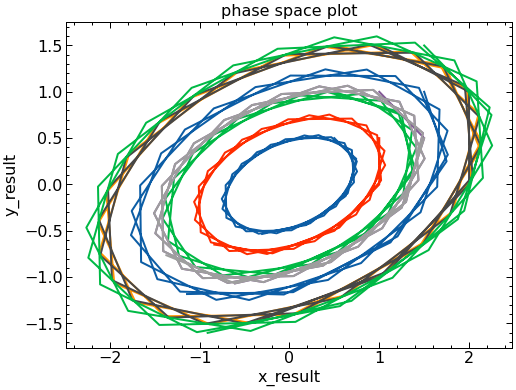

In [10]:

for x0 in np.arange(0.5,2,0.5):
    for y0 in np.arange(0.5, 2, 0.5):
        initialize(x0,y0)
        while t<30:
            update()
            observe()
        plt.plot(xresult,yresult)
        plt.xlabel('x_result')
        plt.ylabel('y_result')
        plt.title('phase space plot')

#### 2) example

$$
x_{t} = x_{t-1} + 0.1(x_{t-1} -x_{t-1} y_{t-1})
$$

$$
y_{t} = y_{t-1} + 0.1(y_{t-1} - y_{t-1} y_{t-1})
$$

$$
x > 0, y > 0
$$

In [16]:
# use same initialize and observe function form above 
# change update rule
def update():
    global x, y, xresult, yresult, t, timesteps 
    nextx = x + 0.1 * (x -x*y)
    nexty = y + 0.1 * (y - y*x)
    x,y = nextx,nexty
    t = t + 1 


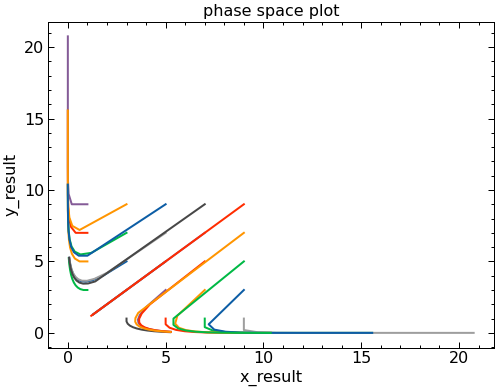

In [21]:
for x0 in np.arange(1,10,2):
    for y0 in np.arange(1,10,2):
        initialize(x0,y0)
        while t<10:
            update()
            observe()
        plt.plot(xresult,yresult)
        plt.xlabel('x_result')
        plt.ylabel('y_result')
        plt.title('phase space plot')

#### 3) Example

$$
x_{t} = 0.5 x + y
$$

$$
y_{t} = -0.5 x +y
$$

$$
z_{t} = -x -y +z
$$

In [50]:

def initialize(x0,y0,z0):
    global x,y,z,xresult,yresult,zresult,t,timerange
    x = x0
    y = y0
    z = z0
    t = 0
    
    xresult = [x]
    yresult = [y]
    zresult = [z]
    timerange = [t]

def update():
    global x,y,z,xresult,yresult,zresult,t,timerange
    nextx = 0.5*x +y
    nexty = -0.5*y + y
    nextz = -x -y + z
    x,y,z = nextx,nexty,nextz
    t += 1
    
def observe():
    global x,y,z,xresult,yresult,zresult,t,timerange
    xresult.append(x)
    yresult.append(y)
    zresult.append(z)
    timerange.append(t)

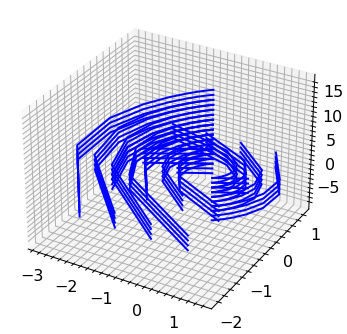

In [53]:

ax = plt.figure(figsize=(10,6)).add_subplot(projection='3d')

for x0 in np.arange(-2,2,1):
    for y0 in np.arange(-2,2,1):
        for z0 in np.arange(-2,2,1):
            initialize(x0,y0,z0)
            while t < 30:
                update()
                observe()
            ax.plot(xresult,yresult,zresult, 'b')
            